In [100]:
import pandas as pd
import numpy as np
import re
import string

In [115]:
coffee_shop = pd.read_csv("/Users/zhangjiawen/Desktop/STATS170A-B/Stat170-Project/yelp/coffee_info.csv")
coffee_shop

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,price
0,0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"3 {'RestaurantsDelivery': 'False', 'Ou...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",2
1,1,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"3 {'RestaurantsDelivery': 'False', 'Ou...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",2
2,2,JX4tUpd09YFchLBuI43lGw,Naked Cyber Cafe & Espresso Bar,10303 108 Street NW,Edmonton,AB,T5J 1L7,53.544682,-113.506589,4.0,12,1,"3 {'RestaurantsDelivery': 'False', 'Ou...","Arts & Entertainment, Music Venues, Internet S...","{'Monday': '11:0-1:0', 'Tuesday': '11:0-1:0', ...",2
3,3,lk9IwjZXqUMqqOhM774DtQ,Caviar & Bananas,2031 Broadway,Nashville,TN,37203,36.148371,-86.798895,3.5,159,0,"3 {'RestaurantsDelivery': 'False', 'Ou...","Coffee & Tea, Restaurants, Wine Bars, Bars, Ni...","{'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...",2
4,4,cVBxfMC4lp3DnocjYA3FHQ,Paws The Cat Cafe,10588 109 Street,Edmonton,AB,T5H 3B2,53.549633,-113.508780,5.0,20,0,"3 {'RestaurantsDelivery': 'False', 'Ou...","Coffee & Tea, Cafes, Pets, Restaurants, Pet Ad...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-21:0', ...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,6699,8n93L-ilMAsvwUatarykSg,Kitchen Gia,3716 Spruce St,Philadelphia,PA,19104,39.951018,-75.198240,3.0,22,0,"3 {'RestaurantsDelivery': 'False', 'Ou...","Coffee & Tea, Food, Sandwiches, American (Trad...","{'Monday': '9:0-19:30', 'Tuesday': '9:0-19:30'...",2
6700,6700,AM7O0cwkxm6w_e0Q7-f9FQ,Starbucks,8817 S US-31,Indianapolis,IN,46227,39.638245,-86.128069,4.0,29,1,"3 {'RestaurantsDelivery': 'False', 'Ou...","Food, Coffee & Tea","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...",2
6701,6701,l9eLGG9ZKpLJzboZq-9LRQ,Wawa,19 N Bishop Ave,Clifton Heights,PA,19018,39.925656,-75.310344,3.0,11,1,"3 {'RestaurantsDelivery': 'False', 'Ou...","Restaurants, Sandwiches, Convenience Stores, C...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",2
6702,6702,cM6V90ExQD6KMSU3rRB5ZA,Dutch Bros Coffee,1181 N Milwaukee St,Boise,ID,83704,43.615401,-116.284689,4.0,33,1,"3 {'RestaurantsDelivery': 'False', 'Ou...","Cafes, Juice Bars & Smoothies, Coffee & Tea, R...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-17:0', '...",2


In [102]:
photo_full = pd.read_json("/Users/zhangjiawen/Desktop/STATS170A-B/170-personalized/yelp/yelp_photos.tar/photos.json",lines = True)

In [103]:
coffee_photo = coffee_shop.merge(photo_full, on='business_id', how='left')
#coffee_photo = coffee_photo.replace(r'^\s*$', np.nan, regex=True)
#coffee_photo['caption'] = coffee_photo['caption'].fillna(np.nan)
coffee_photo = coffee_photo.dropna()

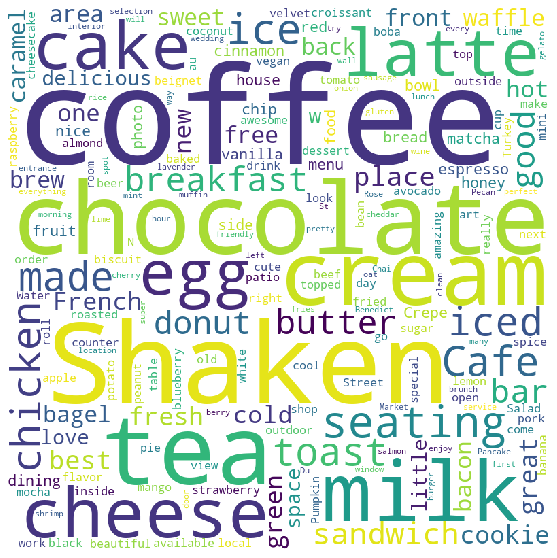

In [116]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
data = [item for item in list(coffee_photo['caption']) if item!=""]
text_s = ""
for s in data:
    text_s += s
clear_wordlist = re.sub('['+string.punctuation+']', '', text_s).split()

final_s = " ".join(w for w in clear_wordlist)
word_cloud = WordCloud(width=800,height=800,collocations = False, background_color = 'white').generate(final_s)

plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.gca().invert_yaxis()
plt.show()